<a href="https://colab.research.google.com/github/Teodil/dataAnaliz/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
file1 = open("/content/drive/MyDrive/ParseData/TestChecked2021_ready.txt", "r")
lines = file1.readlines()
count = 0
texts = [];
#print(len(lines))
print(lines[count+7+7+6])

while len(texts)<1000:
  if count == 0:
    add = 5
  else:
    add = 6
  text = lines[count+add]
  add += 1
  #print(count+add)
  #print('->'+text)
  while '=====' not in lines[count+add]:
    text += ' '+lines[count+add]
    #print('->'+text)
    add +=1
  texts.append(text)
  count += add  

file1.close()

Только стало известно, что Apple лишила китайцев доступа к десяткам тысяч игр на своей платформе, как появилась информация о схожем поступке Huawei. Китайский ИТ-гигант удалил из своего магазина AppGallery все игры разработчика Clash of Clans. Речь идёт о проектах Tencent, которая кроме Clash of Clans известна созданием League of Legends и издательством в Китае PUBG и Monster Hunter: World, передаёт Bloomberg. Согласно данным издания, подобные «телодвижения» связаны с изменениями во взаимодействии компаний, причём инициатором, вроде как, стала сама Tencent. По словам представителей Huawei, Tencent просила прекратить сотрудничество, с чем юридический отдел производителя смартфонов и посоветовал согласиться. Когда Bloomberg обратилась за комментарием к Tencent, её представители заявили, что соглашение между компаниями истекло до того, как могло быть заключено новое. 



In [ ]:
!pip install pymorphy2 # Морфологический анализатор.
!pip install PyMystem3 # Морфологический анализатор.

     |████████████████████████████████| 55 kB 2.2 MB/s 
     |████████████████████████████████| 8.2 MB 10.9 MB/s 


In [ ]:
from collections import Counter # Не считать же частоты самим.
from bs4 import BeautifulSoup as bs
import re
import pymorphy2 # Морфологический анализатор.

from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

from collections import OrderedDict
from operator import itemgetter
from pymystem3 import Mystem
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
morph=pymorphy2.MorphAnalyzer() # Создает объект морфоанализатора и загружет словарь.

In [ ]:
import nltk
from nltk.stem.snowball import SnowballStemmer
import re 
  
snow_stemmer = SnowballStemmer(language='russian')
  
normolizeTexts = []
for i in texts:
  tokens = re.findall('[A-Za-zА-Яа-яЁё]+\-[A-Za-zА-Яа-яЁё]+|[A-Za-zА-Яа-яЁё]+', i)
  normolizeText = ''
  for w in tokens:
      x = snow_stemmer.stem(w)
      normolizeText += x+" "
      #stem_words.append(x)
  normolizeTexts.append(normolizeText)
  
print(normolizeTexts)

  #print stemming results
  #for e1,e2 in zip(i,stem_words):
   #   print(e1+' ----> '+e2)

In [ ]:
morph=pymorphy2.MorphAnalyzer() # Создает объект морфоанализатора и загружет словарь.

In [ ]:
# Pymorphy
def normalizePymorphy(texts):
  normolizeTexts = []
  for text in texts:
    tokens = re.findall('[A-Za-zА-Яа-яЁё]+\-[A-Za-zА-Яа-яЁё]+|[A-Za-zА-Яа-яЁё]+', text)
    sentence = ''
    for t in tokens:
        pv = morph.parse(t)
        #words.append(pv[0].normal_form) # Берем наиболее вероятную форму.
        sentence += pv[0].normal_form+" "
    #return words
    normolizeTexts.append(sentence)
  return normolizeTexts   
        
# Обратите внимание, что про иностранные слова словарь ничего не знает.
normolizeTexts = normalizePymorphy(texts)

In [ ]:
vectorizer = CountVectorizer(analyzer='word',token_pattern="[а-яёА-ЯЁ]+-[а-яёА-ЯЁ]+-[а-яёА-ЯЁ]+|[а-яёА-ЯЁ]+-[а-яёА-ЯЁ]+|[а-яёА-ЯЁ]+")
#vectorizer = TfidfVectorizer(token_pattern="[а-яёА-ЯЁ]+-[а-яёА-ЯЁ]+-[а-яёА-ЯЁ]+|[а-яёА-ЯЁ]+-[а-яёА-ЯЁ]+|[а-яёА-ЯЁ]+")
X = vectorizer.fit_transform(normolizeTexts)
# показать матрицу
#X.toarray()
sort_dict= dict(sorted(vectorizer.vocabulary_.items(), key=lambda x: x[1], reverse=True))
print(sort_dict)

{'ёну': 9223, 'ёна': 9222, 'ёмкость': 9221, 'ёмкий': 9220, 'ящик': 9219, 'ячейка': 9218, 'яхрома': 9217, 'ясность': 9216, 'ясно': 9215, 'ярлык': 9214, 'яркость': 9213, 'ярко-зелёный': 9212, 'яркий': 9211, 'японский': 9210, 'япония': 9209, 'японец': 9208, 'янтарь': 9207, 'янтарный': 9206, 'яндекс': 9205, 'янгэ': 9204, 'янг': 9203, 'январь': 9202, 'январский': 9201, 'ян': 9200, 'якутский': 9199, 'якобы': 9198, 'яйцо': 9197, 'языковой': 9196, 'язык': 9195, 'язвенный': 9194, 'язва': 9193, 'ядро': 9192, 'ядерный': 9191, 'явный': 9190, 'явно': 9189, 'являться': 9188, 'явление': 9187, 'явка': 9186, 'яблочный': 9185, 'я': 9184, 'юрубчено-тохомский': 9183, 'юрский': 9182, 'юрий': 9181, 'юридический': 9180, 'юпитер': 9179, 'юнеско': 9178, 'юмористический': 9177, 'юменс': 9176, 'юлия': 9175, 'юйчжоу': 9174, 'юзер': 9173, 'юзабельный': 9172, 'южный': 9171, 'южнокорейский': 9170, 'южноафриканский': 9169, 'юго-западный': 9168, 'юго-восточный': 9167, 'юво': 9166, 'юар': 9165, 'юань': 9164, 'ю': 9163,

In [ ]:
#!pip uninstall umap
!pip install umap-learn

     |████████████████████████████████| 88 kB 2.6 MB/s 
     |████████████████████████████████| 1.1 MB 36.0 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=90497e02d6f8b732cfc0fc5bdc742d8c6c0c3252e11e1094a414fb8fd496af7e
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=4a5faa6de3e2b15898278c7d66bb3cfab012d332127b05b552ac4dff112537be
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
Successfully built umap-learn pynndescent


In [ ]:
from sklearn.datasets import make_blobs

# Интерактивный режим отображения рисунков - масштабирование, перемещение, вращение, ...
#%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
import umap.umap_ as umap
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer_1 = TfidfVectorizer(max_features=500, min_df=20, max_df=0.7)
tfidf_res = vectorizer_1.fit_transform(normolizeTexts)
#print(tfidf_res)
tfIdf = pd.DataFrame(tfidf_res.toarray(),columns=vectorizer_1.get_feature_names())
tfIdf.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,android,apple,asus,ces,core,edition,facebook,galaxy,google,honor,...,чтобы,экран,эксперт,электронный,это,этот,южнокорейский,являться,январь,ёмкость
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.18801,0.0,...,0.0,0.0,0.000000,0.0,0.082320,0.054798,0.000000,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.000000,0.0,0.037144,0.049451,0.000000,0.0,0.0,0.0
2,0.0,0.109595,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.138912,0.0,0.175546,0.000000,0.000000,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,...,0.0,0.0,0.000000,0.0,0.048151,0.000000,0.132937,0.0,0.0,0.0


In [ ]:

#with open("/content/drive/MyDrive/ParseData/TestChecked2021.txt", encoding="utf-8") as news_file: # Файл с новостями.
#    text_news = [n.split("-----\n")[1] for n in news_file.read().split("=====\n")[1:]]
    
#cvct = TfidfVectorizer(texts)
vectorizer = TfidfVectorizer(token_pattern="[а-яёА-ЯЁ]+-[а-яёА-ЯЁ]+-[а-яёА-ЯЁ]+|[а-яёА-ЯЁ]+-[а-яёА-ЯЁ]+|[а-яёА-ЯЁ]+")
X = vectorizer.fit_transform(normolizeTexts)
vectorizer.get_feature_names_out()
print(X.shape)

(1000, 9224)


In [ ]:
tfidf_res = vectorizer.fit_transform(normolizeTexts)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


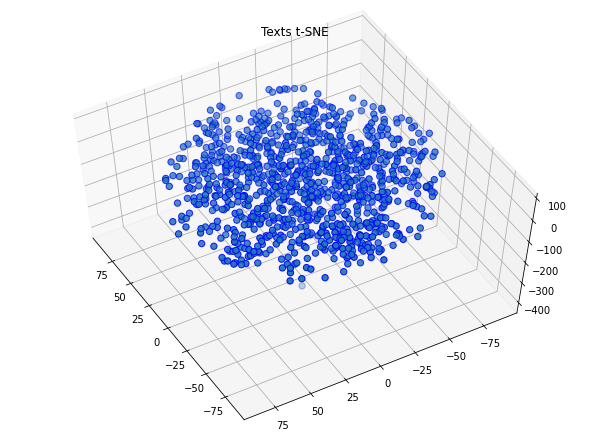

In [ ]:
tsne3 = TSNE(n_components=3)
show_reduced = tsne3.fit_transform(tfidf_res)

fig = plt.figure(3, figsize=(8, 6))
ax = Axes3D(fig, elev=60, azim=150)
ax.scatter(show_reduced[:, 0], show_reduced[:, 1], show_reduced[:, 2], 
               cmap=plt.cm.Set1, edgecolor='b', s=40)
ax.set_title("Texts t-SNE")

plt.show()

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


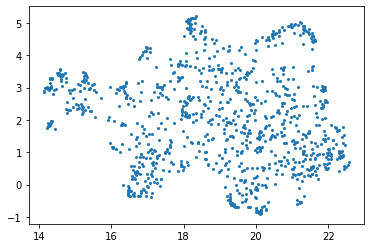

In [ ]:
umap_text = umap.UMAP(n_components=2)
text_reduced = umap_text.fit_transform(tfidf_res)
fig, ax = plt.subplots()
ax.scatter(text_reduced[:, 0], text_reduced[:, 1], s=4)
plt.show()

In [ ]:
center = np.array([20, 4])
texts_group = [i for i, pt in enumerate(text_reduced) if np.linalg.norm(center-pt)<0.3]
[texts[i][:100] for i in texts_group]

['Почти 7 лет назад Microsoft купила компанию-разработчика Minecraft — Mojang. С тех пор у проекта был',
 'Российского оператора Билайн оштрафовали на 1 млн рублей за нарушение Закона о рекламе по части 1 ст',
 'Федеральная антимонопольная служба (ФАС) России оштрафует «Лабораторию Касперского» за нечестную рек']

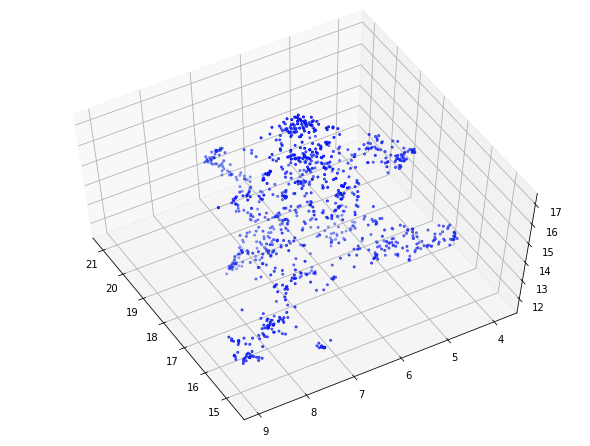

In [ ]:
umap_text3 = umap.UMAP(n_components=3)
text_reduced3 = umap_text3.fit_transform(tfidf_res)
fig = plt.figure(4, figsize=(8, 6))
ax = Axes3D(fig=fig, elev=60, azim=150)
ax.scatter(text_reduced3[:, 0], text_reduced3[:, 1], text_reduced3[:, 2], edgecolor='b', s=4);

In [ ]:
center3 = np.array([16, 8.5, 13])
texts_group3 = [i for i, pt in enumerate(text_reduced3) if np.linalg.norm(center3-pt)<0.5]
[texts[i][:100] for i in texts_group3]

['Наука не стоит на месте. Если раньше человечество могло лишь фантазировать об электромобилях, то сег',
 'Как стало известно, российские специалисты начали лётные испытания новейшей модификации самолёта Ту-',
 'Народно-освободительная армия Китая выпустила новый рекламный фильм, в котором засветился неизвестны',
 'В США создали систему, которая позволит лётчикам лёгких многоцелевых самолётов летать на сверхмалой ',
 'Бразильские СМИ рассказали о готовящихся к выходу в 2021 году сверхтехнологичных бомбардировщиках СШ',
 'В сети появилась информация о том, что американский бомбардировщик B-52 вернулся в состав ВВС США с ',
 'Американский эксперт Томас Ньюдик опубликовал свежий материал, в котором рассказал, заменой какому б',
 'В сети появилась информация об инициации новой программы под кодовым названием ENVision. Её суть буд',
 'В России впервые в истории одновременно взлетели сразу шесть военно-транспортных самолётов Ан-124 «Р',
 'Источник рассказал журналистам, какая судьба ждёт сам

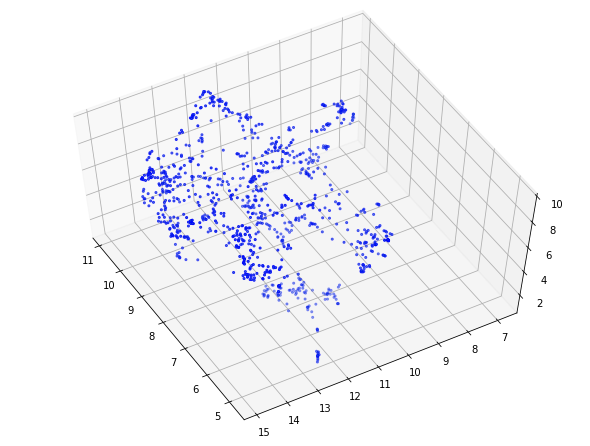

In [ ]:
umap_text3_5 = umap.UMAP(n_neighbors=5, n_components=3)
text_reduced3_5 = umap_text3_5.fit_transform(tfidf_res)
fig = plt.figure(5, figsize=(8, 6))
ax = Axes3D(fig, elev=60, azim=150)
ax.scatter(text_reduced3_5[:, 0], text_reduced3_5[:, 1], text_reduced3_5[:, 2], edgecolor='b', s=4);

In [ ]:
center3_5 = np.array([8, 11, 5])
texts_group3_5 = [i for i, pt in enumerate(text_reduced3_5) if np.linalg.norm(center3_5-pt)<0.5]
[texts[i][:100] for i in texts_group3_5]

['Исследование ЮНЕСКО показало, что почти 20% населения Земли, то есть одна пятая часть пострадают от ',
 'Американские учёные рассказали о связи между любовью к жестоким компьютерным играм и агрессией. Как ',
 'Современная наука имеет достаточно точное представление о том, как выглядели далёкие предки современ',
 'Среди обычных людей распространено ошибочное мнение, что стекло, находясь в расплавленном состоянии,',
 'Ученые поделились неутешительными выводами нового исследования. По мнению специалистов, уже сейчас З',
 'В Ford нашли способ избавиться от распространенной среди водителей проблемы - запотевания стекол авт',
 'В сети появилась информация об интересной находке учёных. Палеонтологи обнаружили в морях Евразии сл',
 'Как стало известно, власти Чехии приняли решение о полном запрете пластиковой посуды в стране. Так, ']